# Project Title - Video Game Sales Analysis

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - Downloading dataset from Kaggle using `opendataset` Library

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: olamartins
Your Kaggle Key: ········


100%|██████████| 381k/381k [00:00<00:00, 111MB/s]

The dataset has been downloaded and extracted.

In [33]:
# Change this
data_dir = './videogamesales'

In [34]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [35]:
project_name = "video-game-sales-analysis"

In [36]:
!pip install jovian --upgrade -q

In [37]:
import jovian

In [38]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "olawumifadero-m/video-game-sales-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/olawumifadero-m/video-game-sales-analysis


'https://jovian.ai/olawumifadero-m/video-game-sales-analysis'

## Data Preparation and Cleaning

**TODO** - Loading the dataset using `Pandas` Library



In [39]:
# Import pandas library
import pandas as pd

In [40]:
sales_data = pd.read_csv(data_dir + '/vgsales.csv')

In [41]:
sales_data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [42]:
sales_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [43]:
# Getting the information about the sales data
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Removing empty records using '.dropna' method

In [44]:
sales_data.dropna(subset= ["Year", "Publisher"], inplace=True)

In [45]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [46]:
# checking the fisrt 10 records of the sales data
sales_data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [47]:
import jovian

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "olawumifadero-m/video-game-sales-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/olawumifadero-m/video-game-sales-analysis


'https://jovian.ai/olawumifadero-m/video-game-sales-analysis'

## Exploratory Analysis and Visualization

**TODO** - In this section, I will be performing exploratory data analysis.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [49]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Performing statistical analysis

In [50]:
total_global_sales = sales_data.Global_Sales.sum()
print('The Total Global Sales from 1980 - 2020 is {:.2f}.'.format(total_global_sales))

The Total Global Sales from 1980 - 2020 is 8811.97.


In [51]:
# Find out the total average global sales from 1980 - 2020
average_global_sales = sales_data.Global_Sales.mean()
print('The Average Global Sales from 1980 - 2020 is: {:.2f}.'.format(average_global_sales))

The Average Global Sales from 1980 - 2020 is: 0.54.


**TODO** - Plotting the graph of sales.

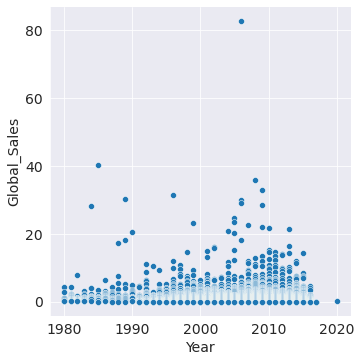

In [52]:
sns.relplot(x ="Year", y = "Global_Sales", data=sales_data)

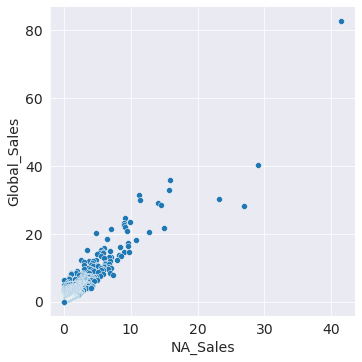

In [53]:
# Plotting the scatterplot of Global Sales and NA_Sales
sns.relplot(x ="NA_Sales", y = "Global_Sales", data=sales_data)

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

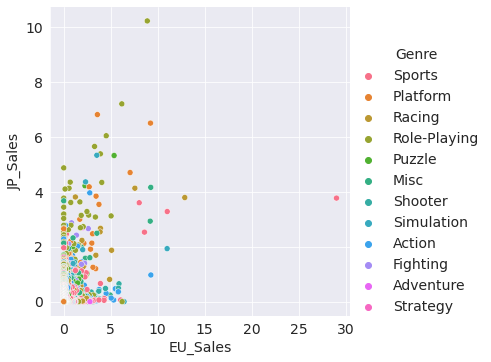

In [54]:
# Plotting the scatterplot of Global Sales and NA_Sales
sns.relplot(x ="EU_Sales", y = "JP_Sales", hue = "Genre", data=sales_data)

**TODO** - Pairplot graph

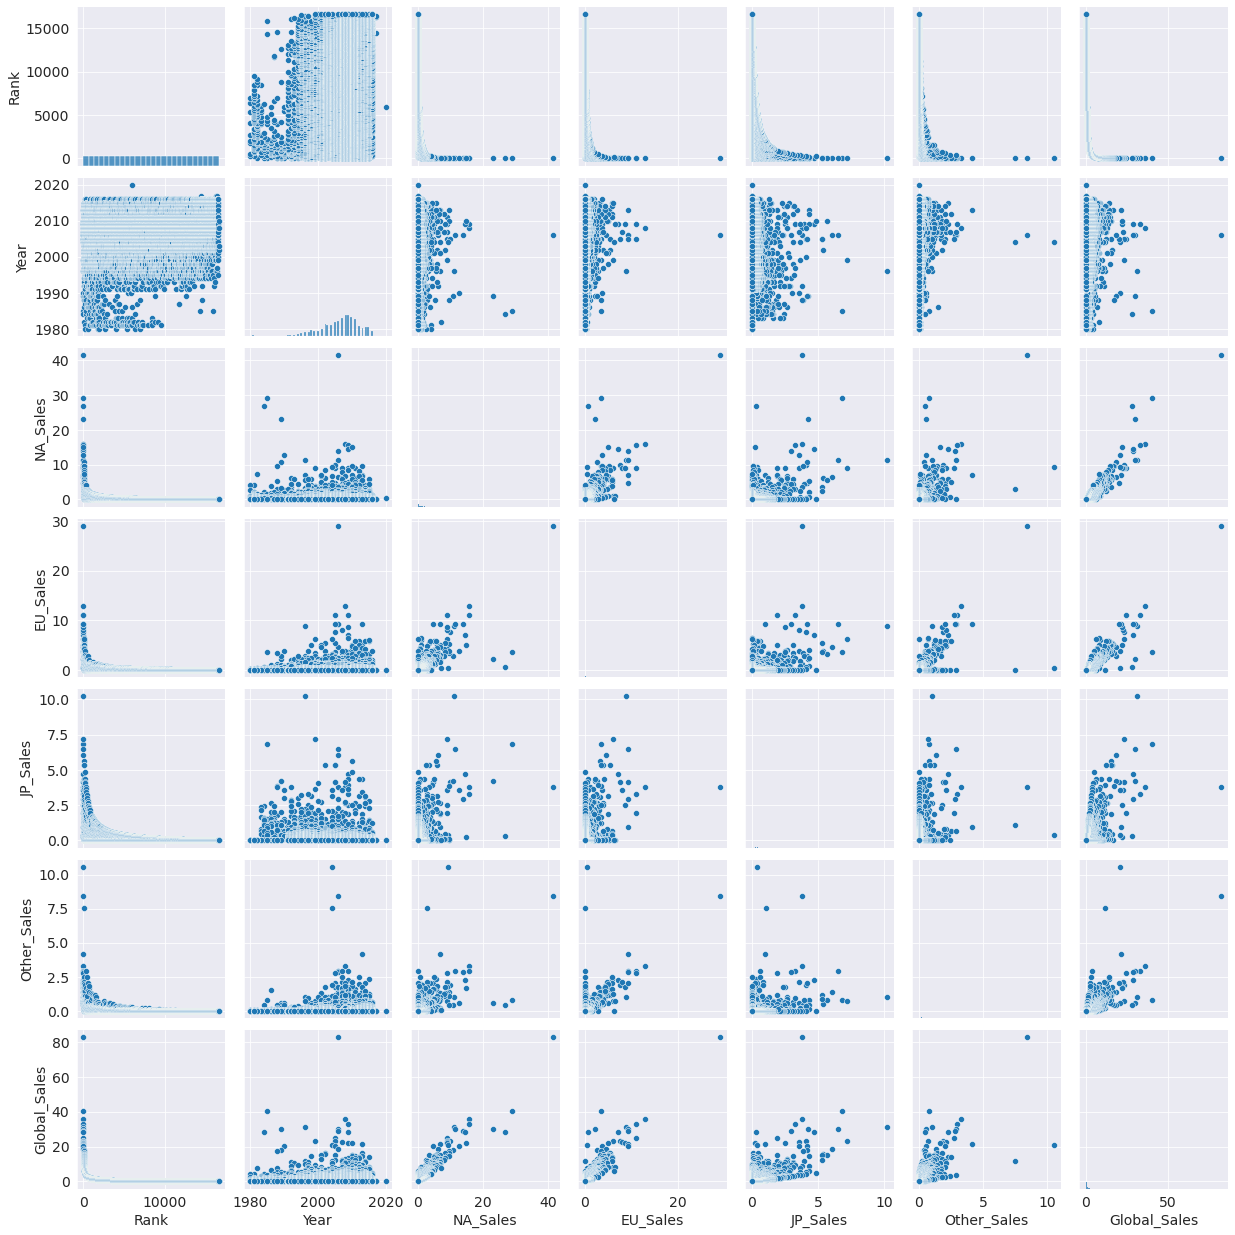

In [55]:
sns.pairplot(sales_data)

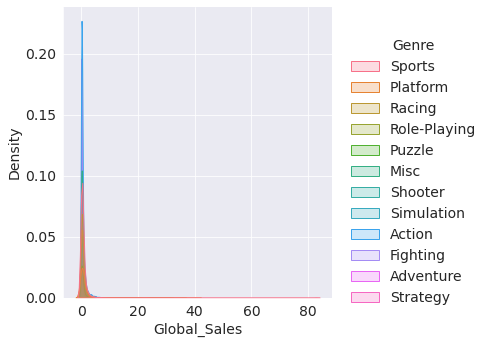

In [56]:
sns.displot(sales_data, x="Global_Sales", hue="Genre", kind="kde", fill=True)

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [57]:
import numpy as np

In [58]:
sales_by_genre = sales_data.groupby('Genre')['Global_Sales'].sum().reset_index()

In [59]:
sales_by_genre

,Genre,Global_Sales
0,Action,1722.84
1,Adventure,234.59
2,Fighting,444.05
3,Misc,789.87
4,Platform,829.13
5,Puzzle,242.21
6,Racing,726.76
7,Role-Playing,923.83
8,Shooter,1026.20
9,Simulation,389.98


<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

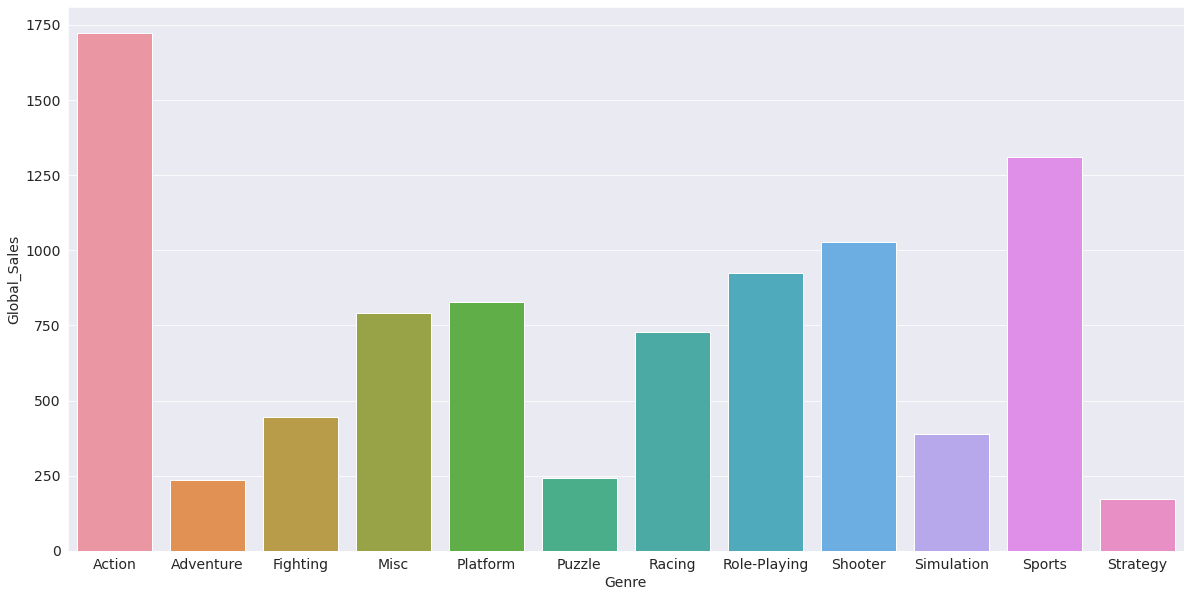

In [60]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x="Genre", y = "Global_Sales", ax=ax, data = sales_by_genre)

Let us save and upload our work to Jovian before continuing

In [61]:
import jovian

In [62]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "olawumifadero-m/video-game-sales-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/olawumifadero-m/video-game-sales-analysis


'https://jovian.ai/olawumifadero-m/video-game-sales-analysis'

## Asking and Answering Questions

TODO - write some explanation here.



#### Q1: TODO - What is the Total Global Sales in the year 2016? 

In [90]:
sales_2016 = sales_data[sales_data['Year'] == 2016]

In [91]:
total_global_sales_2016 = sales_2016.Global_Sales.sum()

In [93]:
print("The Total Global Sales in the year 2016: ${:.2f}.".format(total_global_sales_2016))

The Total Global Sales in the year 2016: $70.90.


#### Q2: TODO - What are top 10 publishers based on their sales

In [129]:
Sales_by_publisher = sales_data.groupby('Publisher')[['Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()

In [130]:
Sales_by_publisher

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
10TACLE Studios,0.07,0.04,0.00,0.00,0.11
1C Company,0.01,0.07,0.00,0.02,0.10
20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.94
2D Boy,0.00,0.03,0.00,0.01,0.04
3DO,6.48,3.04,0.00,0.63,10.12
...,...,...,...,...,...
id Software,0.02,0.00,0.00,0.00,0.03
imageepoch Inc.,0.00,0.00,0.04,0.00,0.04
inXile Entertainment,0.02,0.06,0.00,0.01,0.10


In [134]:
publisher_sales_10 = Sales_by_publisher.sort_values(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],
                                        ascending=False).head(10)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].reset_index()

In [135]:
publisher_sales_10

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,815.75,418.30,454.99,95.19,1784.43
1,Electronic Arts,584.22,367.38,13.98,127.63,1093.39
2,Activision,426.01,213.72,6.54,74.79,721.41
3,Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
4,Ubisoft,252.81,163.03,7.33,50.16,473.54
5,Take-Two Interactive,220.47,117.95,5.83,55.20,399.30
6,THQ,208.60,94.60,5.01,32.11,340.44
7,Microsoft Game Studios,155.35,68.61,3.26,18.56,245.79
8,Sega,108.78,81.41,56.19,24.30,270.70
9,Atari,101.23,25.80,10.70,8.73,146.77


In [155]:
bar_publisher_sales_10 = pd.melt(publisher_sales_10, id_vars=['Publisher'], var_name='Sales_Type', value_name='Sales')

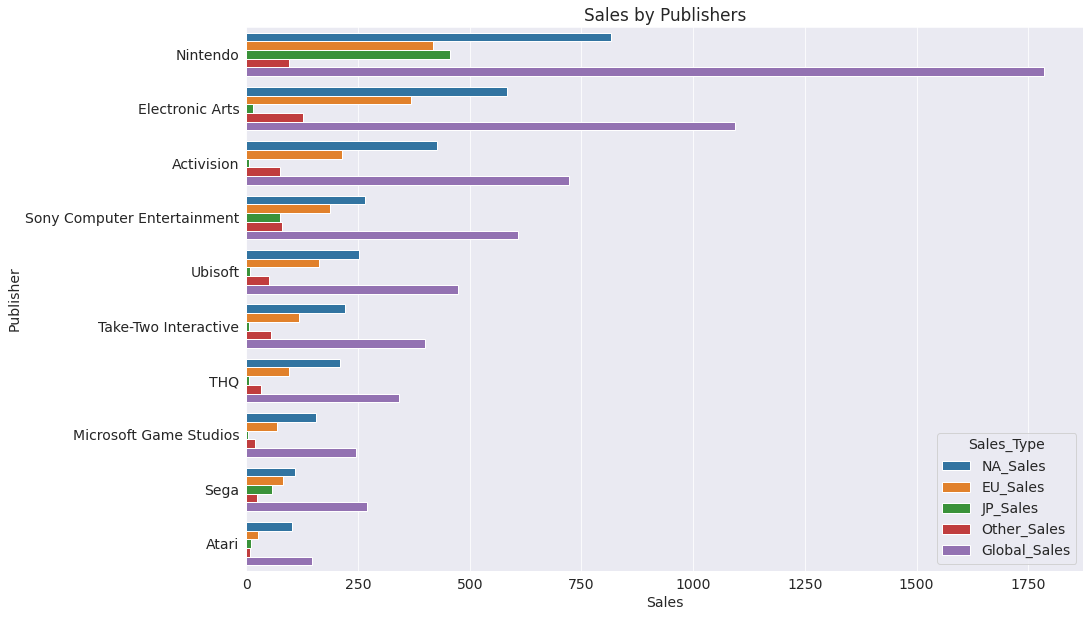

In [178]:
# plotting the chart of top 10 publishers
fig_dim = (15,10)
fig, ax = plt.subplots(figsize = fig_dim)
sns.barplot(x = 'Sales', y = 'Publisher', hue = 'Sales_Type', data = bar_publisher_sales_10).set(title="Sales by Publishers");

#### Q3: TODO - Top 5 Global Sales by Genre

In [163]:
sales_data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [177]:
Sales_by_Genre = sales_data.groupby('Genre')[['Genre','Global_Sales']].sum().reset_index()

In [176]:
Sales_by_Genre_top5 = Sales_by_Genre.sort_values('Global_Sales', ascending=False).head(5)[['Genre','Global_Sales']]
Sales_by_Genre_top5

,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13


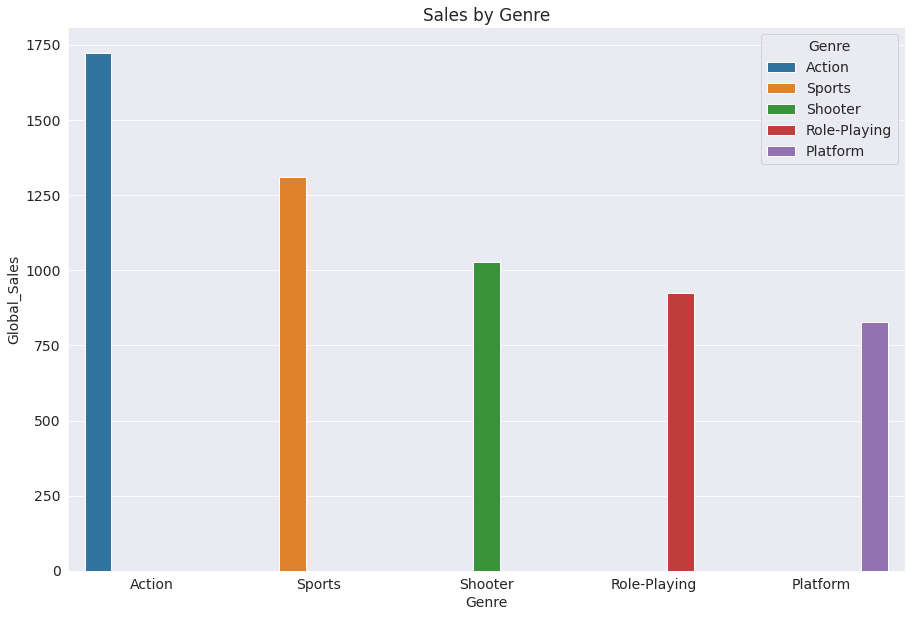

In [179]:
fig_dim = (15,10)
fig, ax = plt.subplots(figsize = fig_dim)
sns.barplot(x = 'Genre', y = 'Global_Sales', hue = 'Genre', data = Sales_by_Genre_top5).set(title="Sales by Genre");

#### Q4: TODO - Timeseries Analysis - Global sales by year

In [195]:
Sales_by_year = sales_data.groupby('Year')['Global_Sales'].sum().reset_index()
sales_from_2000_2020 = Sales_by_year[Sales_by_year['Year'] >= 2000]
sales_from_2000_2020

,Year,Global_Sales
20,2000.0,201.56
21,2001.0,331.47
22,2002.0,395.52
23,2003.0,357.85
24,2004.0,414.01
25,2005.0,458.51
26,2006.0,521.04
27,2007.0,609.92
28,2008.0,678.90
29,2009.0,667.30


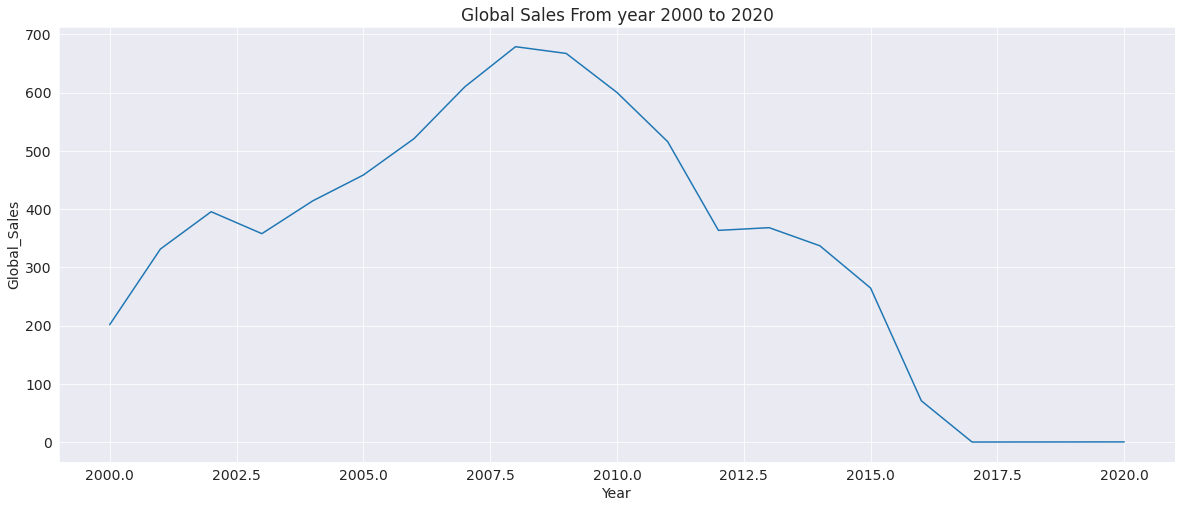

In [204]:
fig_dim = (20,8)
fig, ax = plt.subplots(figsize = fig_dim)
sns.lineplot(data=sales_from_2000_2020, x="Year", y="Global_Sales", ax=ax, markers=True).set(title = "Global Sales From year 2000 to 2020");

In [225]:
maxSales = sales_from_2000_2020['Global_Sales'].max()
print('The highest Sales from 2000 to 2020: ${:.2f}'.format(maxSales))

The highest Sales from 2000 to 2020: $678.90


#### Q5: TODO - Top 10 Platform Global Sales Performance

In [226]:
Sales_by_platform = sales_data.groupby('Platform')[['Platform','Global_Sales']].sum().reset_index()

In [228]:
Sales_by_platform_top10 = Sales_by_platform .sort_values('Global_Sales', ascending=False).head(10)[['Platform','Global_Sales']]
Sales_by_platform_top10

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.60
17,PS3,949.35
26,Wii,909.81
4,DS,818.91
15,PS,727.39
6,GBA,305.62
19,PSP,291.71
18,PS4,278.10
13,PC,254.70


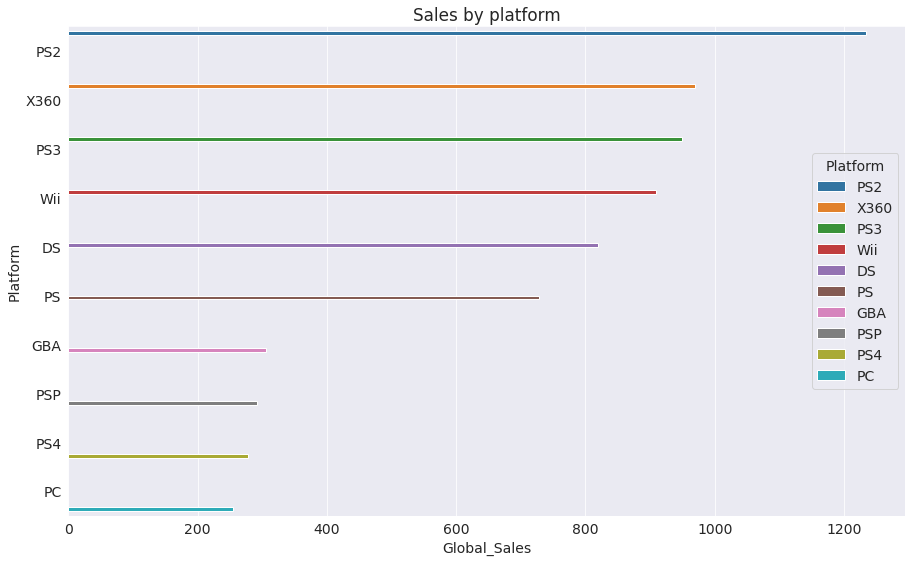

In [235]:
fig_dim = (15,9)
fig, ax = plt.subplots(figsize = fig_dim)
ax = sns.barplot(x = 'Global_Sales', y = 'Platform', hue = 'Platform', data = Sales_by_platform_top10).set(title="Sales by platform");

Let us save and upload our work to Jovian before continuing.

In [236]:
import jovian

In [237]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "olawumifadero-m/video-game-sales-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/olawumifadero-m/video-game-sales-analysis


'https://jovian.ai/olawumifadero-m/video-game-sales-analysis'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

**TODO** - From the Exploratoy Data Analysis above, the following can be deduce:
> * The Total Global Sales is **8811.97** and Average Sales of **0.54**
> * In the year 2016, Global sales was **70.90**
> * Action video game has the highest global sales of **1722.84**
> * Nintendo Publisher has the highest global sales of **1784.43**
> * The highest global sales was in the year **2008** with **678.90 dollar**
> * PS2 has more sales than any other video games. 

In [239]:
import jovian

In [240]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "olawumifadero-m/video-game-sales-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/olawumifadero-m/video-game-sales-analysis


'https://jovian.ai/olawumifadero-m/video-game-sales-analysis'